# Table of Contents
[A General Introduction](#intro)
    [Formulation of the  Problem](#formulation)
    [Dynamic Programming Approach](#approach)
    
[1. Dynamic Programming: Fibonacci numbers](#elementary) 
    [1.1 Recursive](#recursive)
    [1.2 Memorization](#memo)
    [1.3 Dynamic Programming](#dp)
    
3. [Our Model on the Life-Cycle of Human Capital](#our)
4. [Dynamic Programming](#dynamic)
5. [Model Solution](#solution)
6. [Simulation of the Life of an Agent](#simulation)

In this tutorial, we mainly talk about three problems, from elementary to challenging: [**the Fibonacci numbers**](https://en.wikipedia.org/wiki/Fibonacci_number), [**0-1 knapsack**](https://en.wikipedia.org/wiki/Knapsack_problem) and stochastic dynamic programming. 

In the first case, we used three different algorithm: recursive, memorization and Dynamic programming. And then we compare the elapsed time between those three method. It turns out that DP will be the most efficient way.

In 0-1 knapsack problem, the time complexity is O(nC).

For the last one, the stochatic dynamic programming, is refered to [**St. Petersburg Paradox**](https://en.wikipedia.org/wiki/St._Petersburg_paradox). We also did three different models, the naive one, with the discrete state space and discrete state with less memory. In the naive method, the time will exponentially explode, and the last method use the least memory.

# A General Introduction
In mathematics, a problem of constrained multi-period optimization falls into the domain of **dynamic optimization**, of which we will give a brief outline. Our goal is to  introduce two concepts: *backward induction* and the *principle of optimality*.

## Formulation of the  Problem 
Dynamic optimization is concerned  with finding the solution to the optimization of  an objective function, call it $V$. It is defined over multiple time periods and subject to constraints, at least one of which is dynamic. The latter means that it is expressed either as a difference or a differential equation, depending on whether time is discrete or continuous. Of course, dynamic optimization is a major field  in its own right and in order to keep our discussion somewhat contained, we will limit ourselves to studying the simple case when

* time is  **discrete**
* the time horizon is **finite**, with $T$ periods
* and the model is **deterministic**.

We will, later on, move to a stochastic case, as the presented problem is of such nature. 

We assume that the objective function to be maximized is additively separable and takes  the form of 
$$ V(z_0, z_1, \ldots, z_T; x_0, x_1, \ldots, x_T) = \sum_{t=0}^T \beta^t f(z_t, x_t), \quad \text{with } \beta \in (0,1)$$  and that the variables $x$ and $z$ are linked by a difference equation $$x_{t+1} = g(x_t, z_t)$$

These restrictions reduce the general problem  to finding numbers $\{z_i^*, x_i^*\}_{i = 0}^T$ such that $V$ is maximized.

Before moving on to giving an interpretation of the problem, we want to briefly observe  that the objective function $V$ in period 0 (and in any other period, for that matter) can also be formulated recursively as

$$\begin{align}
    V(z_0, z_1, \ldots, z_T; x_0, x_1, \ldots, x_T) &= f(z_0, x_0) + \beta f(z_1, x_1) + \beta^2 f(z_2, x_2) + \ldots + \beta^T f(z_T, x_T)\\
     &= f(z_0, x_0) + \beta \left(\sum_{t=1}^T \beta^{t-1} f(z_t,x_t) \right)  \\
     &= f(z_0, x_0) + \beta V(x_1, \ldots, x_T; z_1, \ldots, z_T)
    \end{align}$$
 
which can be written more parsimonously as $$V_0(z_0,x_0) = f(z_0, x_0) + \beta V_1(x_1)$$ where the subscripts indicate the period the argument starts from. This means that the value of the objective function in any period is the sum of the value from the current period's decision and the discounted value of the decision sequence from the next period onwards.

## Dynamic Programming Approach
There are different strategies that can be used to derive the solution. We will rely on the dynamic programming approach. It relies on the **principle of optimality**, due to [Bellman (1957)](https://www.rand.org/content/dam/rand/pubs/papers/2008/P550.pdf), which states that
> *"An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision."* 

In other words, an optimal decision sequence (where a decision is the choice of a value for the control variable $z_t$) has the property that *any decision at any point in time* has to be optimal with regard to future periods, irrespective of previous decisions and realizations of the state variable.  That is, the decision in the terminal period $T$ has to be optimal for *that* period, given the state variable in period $T$; the decision in the second-last period $T-1$ has to be optimal for that period *as well as* period $T$, given the state variable in period $T-1$;  and so on. When we say that the decision has to be optimal in any given period, we equivalently mean that is has to maximize the objective function from that period onwards. 

Given the recursive structure of the objective function that we have derived above,  a mathematical way to express the same idea is to state that an optimal sequence of decisions $\{z_i^*\}_{i = 0}^T$ has to fulfill the condition that 

$$ V_t(x_t) = \max_{z_t} \left \{ f(z_t,x_t) + \beta V_{t+1}(x_{t+1}) \right \}, \quad \forall t \in \{0,1,\ldots,T\}$$

The point of dynamic programming is to find this optimal sequence of control variables by beginning with finding the decision that optimizes the last period's objective function, which is relatively easier because in the last period, we face a static and not a dynamic optimization problem. However, because we do not yet  know the value of the state variable in period $T$, this will only yield the  optimal decision as a function of the state variable at time $T$ and not an explicit value for the control variable. We can, however, substitute this solution into the optimization problem of the second-last period, which will then become a static optimization problem as well, because the optimality of the last period's decision is already ensured through the substitution.  Continuing this backward substitution  we reach the first period, whose optimal decision is only contingent on the *given* initial value of the state variable. Once we have thereby determined to optimal decision in the first period, this process will yield the optimal decision path for *all* periods. This procedure of beginning  the optimization with the last period and working backward is also called [**backward induction**](https://en.wikipedia.org/wiki/Backward_induction), and this is the solution that we will implement with our code in the next section. We will do so in two parts: First, we are going to implement a solution that *literally* follows the principle of backward induction. Afterwards, we will devise a slightly different version that is better in its performance. 

A last point that is worth mentioning: In the dynamic optimization literature, $V$ stands for *value function*. Note, the objective function and the value function are not exactly the same things. Rather, the value function is the *optimized* version of the objective function, i.e. the objective function evaluated at the optimal decision sequence from some period $t$ onwards. It describes the value that accrues to the decision maker from pursuing the optimal – and not just any other – sequence of decisions.


# 1. Dynamic Programming: Fibonacci numbers

Imagine there is a staircase with a height of 10 steps. From the bottom to the top, each step can only be up one or two steps. 

For example, every time you take 1 step, you take 10 steps. This is one of the ways to go, like 1,1,1,1,1,1,1,1,1,1.

![](imgs/08_staricase.png)

## 1.1 Recursive
One method is to do this recursively. The ways of going up 10 steps equal to the sum of going up 9 steps and going up 9 steps.

That is F(n) = F(n-1) + F(n-2), actually this follows the rule of Fibonacci numbers. Combine this recursive relationship with base cases, we got the solution as follows:

In [1]:
function getClimbingWays(n::Int64)
    if n <= 2
        return n
    else
        return getClimbingWays(n-1) + getClimbingWays(n-2)
    end
end


getClimbingWays (generic function with 1 method)

The process is like a tree:

              F(n)
             /   \
         F(n-1)  F(n-2)
        /    \   /    \
      F(n-2)  F(n-3)  F(n-4)
      /   \    /  \   /   \
    F(n-3) F(n-4)  F(n-5) F(n-6)



But in this way, the same value will be calculated multiple times, which will lower the efficiency. And the time complexity is O(2^n). 

We could create an empty dictionary to 'memorize' the counted values. Once we need those values, we can retrive the values from the dictionary instead of calculating again.

## 1.2 Memorization

In [2]:
function memo(f)
    cache = Dict{Int64, Int64}()    # create empty dictionaries
    function memorized(n)
        if ~haskey(cache, n)
            cache[n] = f(n)
        end
        return cache[n]
    end
    return memorized
end
MemoGetClimbingWays = memo(getClimbingWays)

(::getfield(Main, Symbol("#memorized#3")){typeof(getClimbingWays),Dict{Int64,Int64}}) (generic function with 1 method)

In this way, we lower the time complexity from O(2^n) to O(n). But we can also think about reducing the space complexity.

## 1.3 Dynamic Programming

In each iteration, only the former two states are retained. 

Then instead of reserving all the sub-states like the memorization method do, we can only keep the former two sub-states.

In [3]:
function DPGetClimbingWays(n::Int64)
    if n <= 2
        return n
    end
    a, b = 1, 2    # a, b are the first two sub-states
    temp = 0
    for i in 3:n   # start from the third value
        temp = a + b
        a = b
        b = temp
    end
    return temp
end


DPGetClimbingWays (generic function with 1 method)

## 1.4 Time Comparison 

In [4]:
@time getClimbingWays(50)
@time MemoGetClimbingWays(50)
@time DPGetClimbingWays(50)

 40.535430 seconds (3.55 k allocations: 196.708 KiB)
 41.325906 seconds (3.48 k allocations: 162.660 KiB)
  0.006121 seconds (13.74 k allocations: 736.700 KiB)


20365011074

In [5]:
TimesRecursive, TimeMemo, TimeDP = [], [], []
rangeR = 1:30

for myR in rangeR
    MyTime1 = @elapsed getClimbingWays(40)
    MyTime2 = @elapsed MemoGetClimbingWays(40)
    MyTime3 = @elapsed DPGetClimbingWays(40)
    append!(TimesRecursive, MyTime1)
    append!(TimeMemo, MyTime2)
    append!(TimeDP, MyTime3)
end

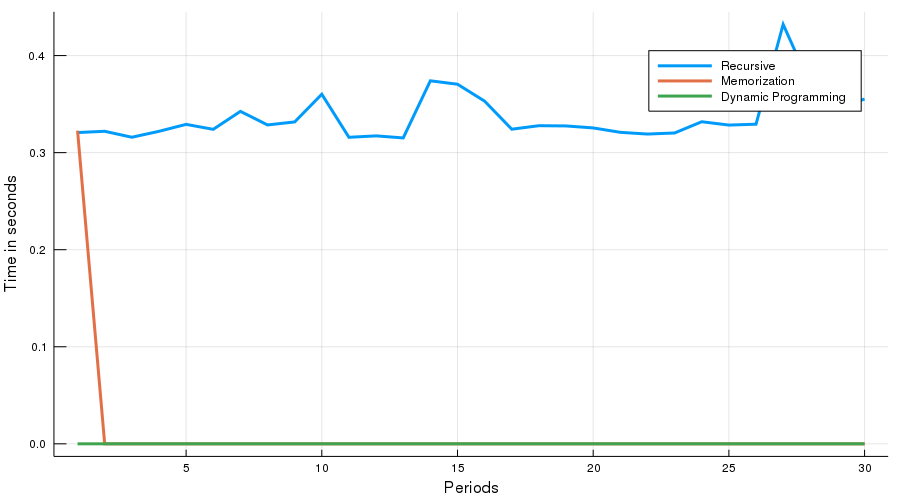

In [6]:
using Plots
gr(fmt = :png, size = (900, 500))
plot(rangeR, TimesRecursive, lw = 3, label = "Recursive", xlabel = "Periods", ylabel = "Time in seconds")
plot!(rangeR, TimeMemo, lw = 3, label = "Memorization", xlabel = "Periods", ylabel = "Time in seconds")
plot!(rangeR, TimeDP, lw = 3, label = "Dynamic Programming", xlabel = "Periods", ylabel = "Time in seconds")


# 2. second example: 0-1 knapsack problem
The problem above is the simplest question in dynamic programming area since it only has one dimension. Now we are going to introduce a more complecated one.

Here is the breif introduciton of this problem. Given weights and values of n items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. In other words, given two integer arrays val[0..n-1] and wt[0..n-1] which represent values and weights associated with n items respectively. Also given an integer W which represents knapsack capacity, find out the maximum value subset of val[] such that sum of the weights of this subset is smaller than or equal to W. You cannot break an item, either pick the complete item, or don’t pick it (0-1 property).

Here is a concrete problem: if there is a thief having a knapsack whose capacity is 4 pounds, what should he steal to maximize the value of stolen goods.
![grid](imgs/08_dp100.png)   
![grid](imgs/08_dp3.png)

The simplest idea is that we try to find all the possible kinds of combination of stuffs, and find out the maximum value of it. But the time complexity of this way is O(2^n), which is not possible to solve the problem when n is large. So dynamic programming should be used to solve this problem.
Every algorithm of dynamic programming starts from a grid, here is the grid for 0-1 knapsack problem. 

![grid](imgs/08_dp4.png)
each row is one item,so lets start from the row of guitar
![grid](imgs/08_dp5.png)

This is guitar line, meaning that you could try to put guitar into your knapsack. In each grid, you need to make a simpe decition: Weather to steal this stuff.
The first grid means that the knapsack could contain 1 pound stuff, guitar is also 1 pound, which means that it could be put in the knapsack! As a result, the value of the first grid is $1500.
Let's fill in the first grid:


![grid](imgs/08_dp6.png)

Let's turn to the second grid, the second grid could contain 2 pounds stuff, so the thief can steal the guitar. Remember that this is the first row, and only guitar could be chosen. In other words, we pretend that could not steal other two stuffs now.
![grid](imgs/08_dp7.png)
Similarly, we fill in the fist line
![grid](imgs/08_dp8.png)
Then, we start to fill in the second line,which is sound's line. Now you are in line 2, the stuffs the theif could steal are guitar and sound. In each line, stuffs that could be stolen is the stuff of this line and all the stuffs of the previous line. Thus, laptop still can't be stolen. Now looking at the first grid in the second line, and decide whether the thief could steal sound. The answer is no becouse the sound is over 1 kilogram. The maximum value is still $1500.

Then we continue to fill in the next two grids. Since these knapsack could not contain the sound, the maximum value is $1500.
![grid](imgs/08_dp9.png)

When it comes to the forth grid in the second line, it could contain the sound. Then we compare the weight of sound with the weight of the guitar, we choose sound, filling $3000 into the grid.

![grid](imgs/08_dp10.png)

Next, to deal with the third line. Obviously, The first two grids is still 1500 dollors.
The third grid in the third line is different. Since this is a knapsack that could contain 3-kilograms stuffs, the thief could choose laptop whose value is $2000 instead of the guitar.

![grid](imgs/08_dp11.png)

The last grid is the most interesting one, 
![grid](imgs/08_dp13.png)
The previous maximum value is 3000, you could choose steal laptop instead sound,but it only worth 2000, and you still have 1 pound to be used. What is the maximum value that could be put in this sub-knapsack whose capacity is 1 pound? We have caculated that before!  
![grid](imgs/08_dp12.png)
We do not need to compute the same subproblems again and again, which saves a great deal of time when tackling sophisticated problems. 
    
According to the value computed before, the maximum value that could be put in the knapsack with 1 pound capacity is $1500


![grid](imgs/08_dp14.png)
so we fill 3500 dollors in the last grid 
![grid](imgs/08_dp15.png)

## 2.1 Transition Equation
We could introduce a formula to solve this problem. The formula is 
![grid](imgs/08_dp17.png)

In [7]:
function DP2( V::Array, W::Array, knapsack::Integer )
    J = length(V)
    Value = Array{Float64}(undef, J+1, knapsack+1)
    
    
    #s = Array{Int64}(undef, J, gp)
    for i = 2:J+1
        for j = 2:knapsack+1
            if j < W[i-1]+1
                Value[i,j] = Value[i-1,j]
            elseif j >= W[i-1] +1
                Value[i,j] = max((V[i-1]+ Value[i-1,j-W[i-1]]), Value[i-1,j])
            end
                       
        end
    end
    
            
    return Value[J+1,knapsack+1]
end


DP2 (generic function with 1 method)

In [8]:
TimesApprox = []
rangeJ = 10:1000

for myJ in rangeJ
    V = rand(collect(50:120),myJ)
    W = rand(collect(3:18),myJ)
    
    MyTime = @elapsed DP2(V,W,16)
    append!(TimesApprox, MyTime)
end

In [9]:
using Plots

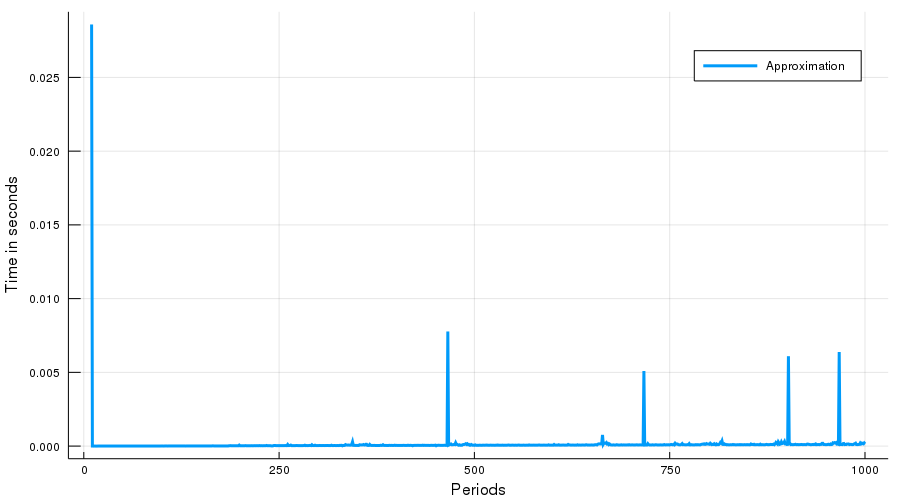

In [10]:
plot(rangeJ, TimesApprox, lw = 3, label = "Approximation",
     xlabel = "Periods", ylabel = "Time in seconds")
#plot!(rangeJ, TimesNaive, lw = 3, label = "Naive")

Then it's the most challenging case -- Stochastic Dynamic Programming



# 3. Stochastic Dynamic Programming

Since the presented problem is stochastic, we will generalize the above-mentioned notation from the deterministic to the stochastic case: 
$$ V_t(x_t) = \max_{z_t} \left \{ E_t [ f(z_t,x_t) + \beta V_{t+1}(x_{t+1})] \right \}, \quad \forall t \in \{0,1,\ldots,T\}$$
or for a discrete state space
$$ V_t(x_t) = \max_{z_t} \left \{ E_t [ f(z_t,x_t) ] + \beta \sum_{x_{t+1}} Pr(x_{t+1}| z_t) V_{t+1}(x_{t+1}) \right \}, \quad \forall t \in \{0,1,\ldots,T\}$$

## A Gambling Game

Consider the following problem. An individual can participate in a gamble G times. Every time they can choose a bet out of the set $\Omega$. For example, they can set a bet $b \in \{0,1,2\}$. With probability $p_{win}$, the bet is won and the player will receive his bet doubled. The player will lose the bet with probablity $p_{loss}=(1-p_{win})$. They start with wealth $W_0$. After the last round of the game, they can consume their attained wealth $W_G$ and derive utility $u(W_{G})$ from it. Furthermore, a bet can never exceed the amount of wealth of a player. Note that this game is related to the [**St. Petersburg Paradox**](https://en.wikipedia.org/wiki/St._Petersburg_paradox).

We can formulate the problem as follows:
\begin{align}
V_g(w_g) &= \max_{b_g} p V_{g+1}(w_g+b_g) + (1-p)V_{g+1}(w_g-b_g)\hspace{1cm}\\
V_{G}(w_G) &= \max_{b_G} p u(w_G+b_G) + (1-p) u(w_G+b_G)\\
&s.t. \hspace{1cm} b_g \leq W_g \hspace{1cm} and \hspace{1cm} b_g \in \Omega
\end{align}
Additionally, we have $w_{g+1} = w_g+b_g$, if the game is won, and $w_{g+1} = w_g-b_g$, if it is lost.
Now that we have mastered the theory we want to implement the theory into code. 
Our first approach will be one where we solve the model recursively.  We do so by simply formulating a function that calls on itself.

## 3.1 Naive Dynamic Programming Approach

In [11]:
Ω = [0,1,2]
G = 10
win_p = 0.6
W = 5

5

In [12]:
function u(wealth)
    return log(wealth)
end

function game(wealth, bets::Array, win_p, g, G)
    if g==G+1
        max_cont_value=u(wealth)
        optimal_bet = NaN
    else
        # set the maximum value as -Inf
        max_cont_value = -Inf
        optimal_bet = NaN
        for bet in bets
            if bet<=wealth
                (win, aux1) = game(wealth+bet, bets, win_p, g+1, G)
                (loss, aux2) = game(wealth-bet, bets, win_p, g+1, G)
                cont_value = win_p*win + (1-win_p)*loss

                if cont_value>max_cont_value
                    optimal_bet = bet
                    max_cont_value = cont_value
                end
            end
        end
    end
    value = max_cont_value
    bet = optimal_bet
    return (value,bet)
end
game(W, Ω, win_p, 1, G)

(1.7838428054281057, 1)

In [13]:
TimesNaive = []
rangeG = 1:11

for myG in rangeG
    MyTime = @elapsed game(W, Ω, win_p, 1, myG)
    append!(TimesNaive, MyTime)
end

In [14]:
using Plots
gr(fmt = :png, size = (900, 500))

Plots.GRBackend()

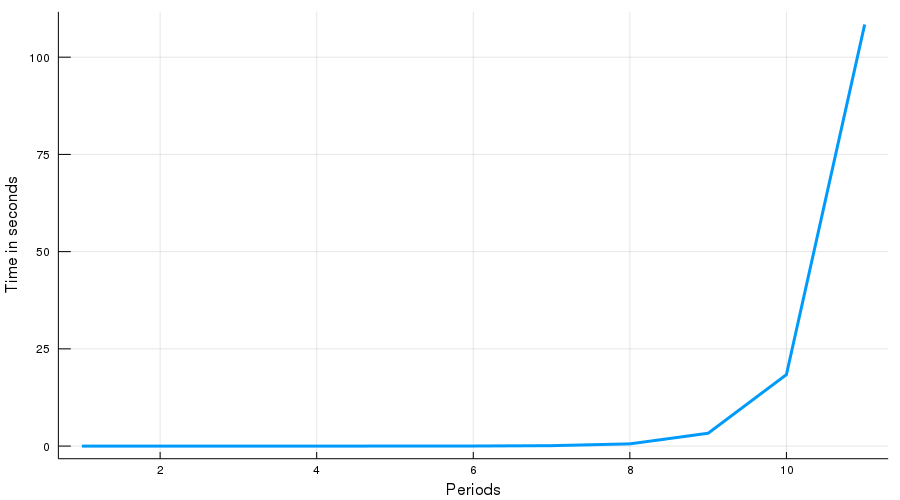

In [15]:
plot(rangeG, TimesNaive, lw = 3, label = "", xlabel = "Periods", ylabel = "Time in seconds")

## 3.2 Dynamic Programming with Discrete State Space
As we have seen, using an approach that relies on a recursive implementation of backward induction  yields an exponentially increasing time to solve the model as more time periods are added. This phenomenon is an example of the **curse of dimensionality**, which describes a situation in  data analysis in which an algorithm applied to a  high-dimensional problem (i.e. a problem with many model features /  parameters / time-periods, etc.) encounters difficulties that are not visible in the same but lower dimensional problem (with fewer features / parameters / time-periods). In our case, the underlying reason for the occurrence of this curse is that each time our value function is called, it has to compute all combinations of possible decision sequences. As more time periods are added, the space of possible sequences becomes disproportionally larger so that the computation time also increases exponentially.   

We can overcome this issue by using so-called **discretization**. This means that the state space (the set on which  the state variable is defined on) is sliced into many "discrete" points. Recall that the problem that backward induction was trying to overcome was that for any  period larger than one, the value of the state variable is unkown in advance. We were, therefore, unable to evaluate the value function directly  without  first finding the first-period decision through backward induction.

The point of discretization is now that we simply *assume* that the state variable will take on one of finitely many values. These values are chosen such that they form a fine grid from the lowest to the highest considered value of the state variable. Reasonable borders of the state space could be the lowest and higher possible value possible within the problem. In our case, this is the wealth of a player that always bets the maximum possible bet and either always loses or always wins. Using this grid, we can make calculations with the state variable as if it was a known quantity. 

To see how this works, we describe the procedure in some more detail. In the following exposition, capital letters will refer to vectors and small letters to scalar values. 
1. We reformulate the aforementioned problem in the following way:
\begin{align}
V_g(w_g) &= \max_{b_g} p V_{g+1}(w_g+b_g) + (1-p)V_{g+1}(w_g-b_g)\hspace{1cm}\\
V_{G+1} &= u(w_{G+1})\\
&s.t. \hspace{1cm} b_g \leq W_g \hspace{1cm} and \hspace{1cm} b_g \in \Omega
\end{align}
Note that the content of the problem is equivalent to before. It is only reformulated to match the rationale of the code we will use for the discretization method. $V_{G+1}$ denotes the value of finishing the last game $G$ with wealth $w_{G+1}$. 
* Define a grid $W$ that contains equally spaced values in the intervall $[w_{min}, w_{max}]$, where $w_{min}, w_{max}$ refer to the boundaries of the considered state space. We will use $n = 201$ points. A finer grid might yield a more accurate solution, but would slow down the algorithm. Conversely, a coarser grid would be faster, but less accurate.
* Before continuing, we will initialize two matrices: One for the value functions and another one for the optimal policy functions. They have the following dimensions: $G+1\times n$. This is due to the number of states we consider (equal to the number of grid points) and the number of stages we consider (the number of games plus the last stage where utility is derived from the resulting wealth).
* Using $W$, we compute all utilities from the considered state space after finishing the *final* Game $G$. Since this is $V_{G+1}(w_{G+1})$. We store it in the value function grid in row $G+1$.

* We are now ready to start the backward induction. Starting with the last game, we will solve for the optimal bet at each point in the grid. We do so by looping throught the grid and solving for the optimal decision by refering to the values of the next game. Due to backward induction, said value has already been computed. The values that are off the grid are inter- or extrapolated.
 
* In each column and row iteration, we calculate the the value function for that (row, column) pair of the matrix as follows: We compute the expected value from a bet: $p V_{g+1}(w_g+b_g) + (1-p)V_{g+1}(w_g-b_g)$.We choose the bet with the highes value. Adjacently, we store the maximized value and the optimal bet in their according positions in the initialized matrices.

* The loop than iterates to the next row, and the procedure continues until all (row, column) pairs of our matrices have been filled.

* In the end, the $(i,g)$-entry in the full decision matrix tells us the optimal decision in game $g$ for a level of wealth corresponding to the $i^{th}$ entry in $W$. To find the optimal decision in $g$ for a level of wealth that does not coincide with a point on the grid, we can simply adopt the decision corresponding to the nearest value of wealth instead. 

We gain speed because we no longer have to solve the model through complete backward induction every time we call the value function, although the solution that we find is now only an approximation of the exact one.  Additionally, increasing the number of periods in our model by adding one more column to our matrices does not make much of a difference, because each column iteration is computationally approximately equally intensive.  The *discretization* approach therefore overcomes the curse of dimensionality. As we will see below where we simulate the model, the computation time will increase approximately linearly in the number of periods.
### 3.2.1 Grid for total money

In [16]:
gp = 201
Ω = [0,1,2]
G = 10
win_p = 0.6

upper_bound = W + maximum(Ω) * G
lower_bound = maximum([W - maximum(Ω) * G, 0])
h_0 = lower_bound
h_J = upper_bound

grid_h = range(h_0, stop = h_J, length = gp)

0.0:0.125:25.0

### 3.2.2 Find policy function

In [17]:
using Interpolations

V = Array{Float64}(undef, G+1, gp)
s = Array{Int64}(undef, G+1, gp)

# solve the last period
for (index, h) in enumerate(grid_h)
    V[G+1,index] = u(h)
    s[G+1,index] = 0
end

# replace the -inf value to a very small value for interpolation
if V[G+1,1] == -Inf
    V[G+1,1] = -10^12
end

# Iterate backwards to approximate s(g,h)
for g = G:-1:1
    # Linerar interpolation for this period
    MyItp = interpolate((collect(grid_h),), V[g+1,:], Gridded(Linear()))
    V_tw = extrapolate(MyItp, Line())
    
    # School choice for each h
    for (index, h) in enumerate(grid_h)
        # bet 0
        v0 = V_tw(h)
        
        # bet 1
        if h>1
            v1 = win_p*V_tw(h+1) + (1-win_p)*V_tw(h-1)
        else
            v1 = v0-0.01
        end

        # bet 2
        if h>2
            v2 = win_p*V_tw(h+2) + (1-win_p)*V_tw(h-2)
        else
            v2 = v0-0.01
        end
        
        #Choice
        if maximum([v0, v1, v2]) == v0
            s[g,index] = 0
            V[g,index] = v0
        elseif maximum([v0, v1, v2]) == v1
            s[g,index] = 1
            V[g,index] = v1
        else
            s[g,index] = 2
            V[g,index] = v2
        end
    end
end

### 3.2.3 Monte Carlo simulation

In [18]:
# set the monte carlo rounds
R = 500
sim_s = Array{Float64}(undef, R, G+1)
sim_i = Array{Float64}(undef, R, G+1)
sim_h = Array{Float64}(undef, R, G+1)

for r in 1:R
    sim_h[r, 1] = 5.0
    for g = 1:G+1
        # Linerar interpolation for bets
        MyItp = interpolate((collect(grid_h),), s[g,:], Gridded(Constant()))
        MyS = extrapolate(MyItp, Flat())

        sim_s[r, g] = MyS(sim_h[r, g])

        # income
        if rand()<win_p
            sim_i[r, g] = sim_s[r, g]
        else 
            sim_i[r, g] = -sim_s[r, g]
        end

        # Total money
        if g < G+1
            sim_h[r, g+1] = sim_h[r, g] + sim_i[r, g]
        end
    end
end

## 3.3 Visualization

### 3.3.1 Plot the bet choice

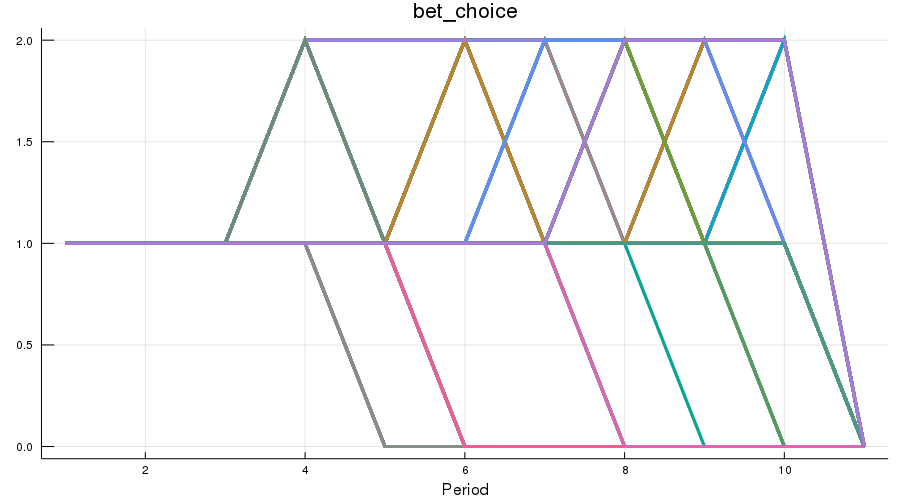

In [19]:
using Plots
plot(1:G+1, transpose(sim_s), label = "", lw = 3, xlabel = "Period", title = "bet_choice")

### 3.3.2 Plot the payoff in every bet

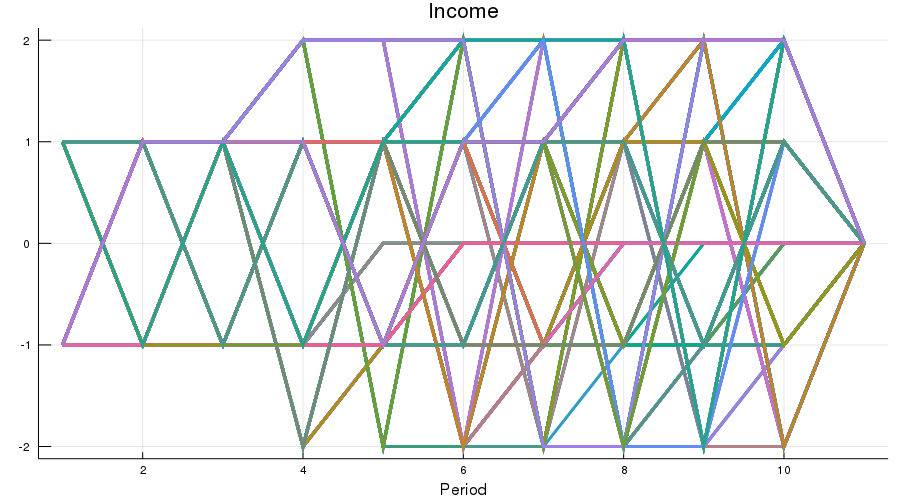

In [20]:
plot(1:G+1, transpose(sim_i), label = "", lw = 3, xlabel = "Period", title = "Income")

### 3.3.3 Plot the total money in every bet

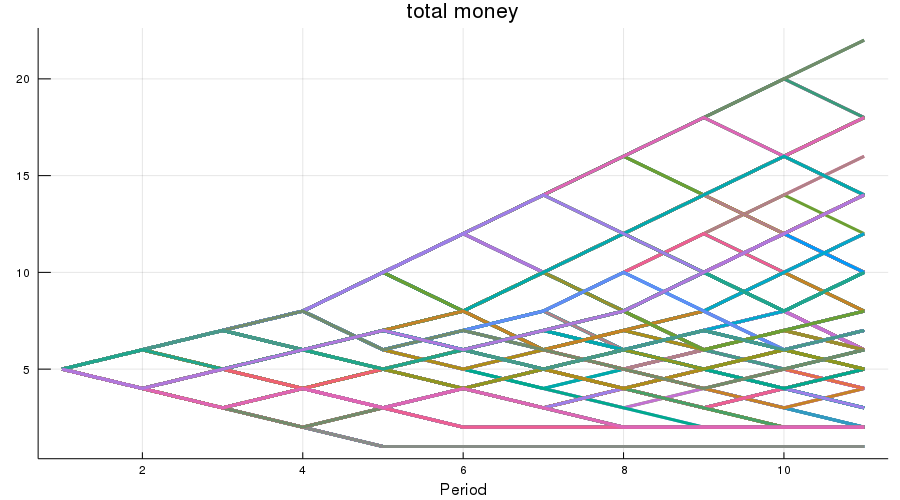

In [21]:
plot(1:G+1, transpose(sim_h), label = "", lw = 3, xlabel = "Period", title = "total money")

In [22]:
function discrete_game(wealth, bets::Array, win_p, G)
    # set grid number
    gp = 201
    
    # calculate the limit of total money
    upper_bound = wealth + maximum(bets) * G
    lower_bound = maximum([wealth - maximum(bets) * G, 0])
    h_0 = lower_bound
    h_J = upper_bound

    grid_h = range(h_0, stop = h_J, length = gp) 
    V = Array{Float64}(undef, G+1, gp)
    s = Array{Int64}(undef, G+1, gp)

    # solve the last period
    for (index, h) in enumerate(grid_h)
        V[G+1,index] = u(h)
        s[G+1,index] = 0
    end

    # replace the -inf value to a very small value for interpolation
    if V[G+1,1] == -Inf
        V[G+1,1] = -10^12
    end

    # Iterate backwards to approximate s(g,h)
    for g = G:-1:1
        # Linerar interpolation for this period
        MyItp = interpolate((collect(grid_h),), V[g+1,:], Gridded(Linear()))
        V_tw = extrapolate(MyItp, Line())

        # School choice for each h
        for (index, h) in enumerate(grid_h)
            # bet 0
            v0 = V_tw(h)

            # bet 1
            if h>1
                v1 = win_p*V_tw(h+1) + (1-win_p)*V_tw(h-1)
            else
                v1 = v0-0.01
            end
            
            # bet 2
            if h>2
                v2 = win_p*V_tw(h+2) + (1-win_p)*V_tw(h-2)
            else
                v2 = v0-0.01
            end

            # assign value of policy matrix
            if maximum([v0, v1, v2]) == v0
                s[g,index] = 0
                V[g,index] = v0
            elseif maximum([v0, v1, v2]) == v1
                s[g,index] = 1
                V[g,index] = v1
            else
                s[g,index] = 2
                V[g,index] = v2
            end
        end
    end
    
    # monte carlo simulation
    R = 500 # set the monte carlo rounds
    sim_s = Array{Float64}(undef, R, G+1)
    sim_i = Array{Float64}(undef, R, G+1)
    sim_h = Array{Float64}(undef, R, G+1)

    for r in 1:R
        sim_h[r, 1] = wealth
        for g = 1:G+1
            # Linerar interpolation for bets
            MyItp = interpolate((collect(grid_h),), s[g,:], Gridded(Constant()))
            MyS = extrapolate(MyItp, Flat())

            sim_s[r, g] = MyS(sim_h[r, g])

            # income
            if rand()<win_p
                sim_i[r, g] = sim_s[r, g]
            else 
                sim_i[r, g] = -sim_s[r, g]
            end

            # Total money
            if g < G+1
                sim_h[r, g+1] = sim_h[r, g] + sim_i[r, g]
            end
        end
    end
    
    return sum(map(u, sim_h[:, G+1]))/R
end
discrete_game(W, Ω, win_p, G)

1.7982829729544836

## 3.4 Model Comparison

### 3.4.1 Time Comparison between Naive method & Discrete method

In [23]:
TimesDiscrete = []
rangeG = 1:11
for myG in rangeG
    MyTime = @elapsed discrete_game(W, Ω, win_p, myG)
    append!(TimesDiscrete, MyTime)
end

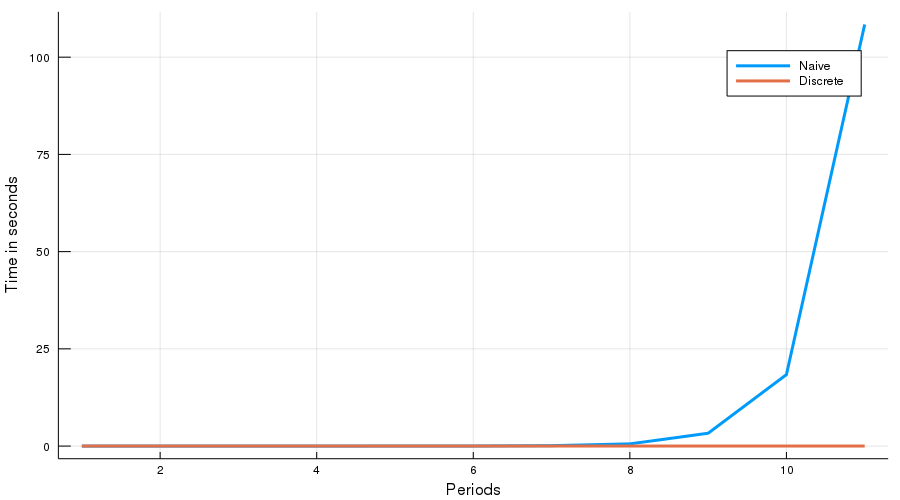

In [24]:
plot(rangeG, TimesNaive, lw = 3, label = "Naive", xlabel = "Periods", ylabel = "Time in seconds")
plot!(rangeG, TimesDiscrete, lw = 3, label = "Discrete")

### 3.4.2 Discrete Solution: Low memory usage version
In the naive approach, we can use the recursive way to get the true value. In this low memory usage version, firstly, we generate a array to store the **last period(G+1)** utility by the given first period wealth and the range of periods. **Then we can get the utility of the G period utility by the G+1 period utility.** Then by iteration, we can repeat the above procedure to get the first period utility.

![iterate from last period](imgs/08_LMDS.png)


In this way, we only need two arrays instead of a big matrix in the interpolation method to get the true utility in the first period. Besides, a precise utility rather than approximate utility can be drived and it's not necessary to do the simulation procedure.

In [25]:
function discrete_game_less_memory(wealth, bets::Array, win_p, G)
    # calculate the last period values
    upper_bound = W + maximum(bets) * G
    lower_bound = maximum([W - maximum(bets) * G, 0])
    V_T = collect(lower_bound:upper_bound)
    U_T = map(u, V_T)
    
    # create a function which can get the t-1 value from t values
    function val_recur(ind, values)
        extend = minimum([maximum(bets), ind-1])
        val = values[ind]
        if extend > 0
            for i in 1:extend
                val_t = win_p*values[ind+i] + (1-win_p)*values[ind-i]
                val = maximum([val, val_t])
            end
        end
        return val
    end
    
    # do backward iteration
    for g in collect(G:-1:1)
        U_1 = U_T
        upper_bound_0 = W + maximum(bets) * (g-1)
        lower_bound_0 = maximum([W - maximum(bets) * (g-1), 0])
        U_0 = Array{Float64}(undef, upper_bound_0-lower_bound_0+1)
        
        if lower_bound_0 < maximum(bets)
            index_diff = lower_bound_0
            else
            index_diff = maximum(bets)
        end

        for (i, value) in enumerate(U_0)
            i_for_U_1 = i + index_diff
            U_0[i] = val_recur(i_for_U_1, U_1)
        end

        U_T = U_0
    end
    return U_T
end
discrete_game_less_memory(W, Ω, win_p, G)

1-element Array{Float64,1}:
 1.7838428054281057

### 3.4.3 Time Comparison among Naive method, Discrete method & Memoryless Discrete method

In [26]:
TimesDiscreteLM = []
rangeG = 1:11

for myG in rangeG
    MyTime = @elapsed discrete_game_less_memory(W, Ω, win_p, myG)
    append!(TimesDiscreteLM, MyTime)
end

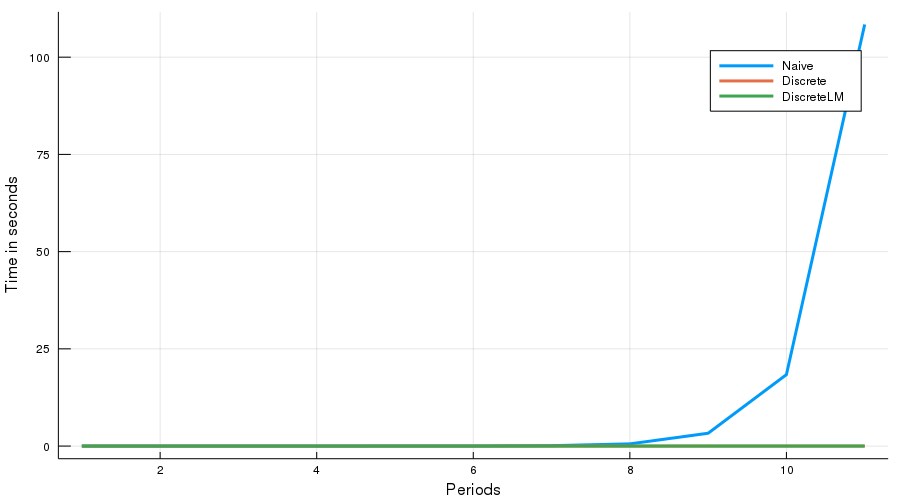

In [27]:
plot(rangeG, TimesNaive, lw = 3, label = "Naive", xlabel = "Periods", ylabel = "Time in seconds")
plot!(rangeG, TimesDiscrete, lw = 3, label = "Discrete")
plot!(rangeG, TimesDiscreteLM, lw = 3, label = "DiscreteLM")

As we can see, this picture shows the difference among the three method. The **Naive method takes an exponential time**，however **both discrete methods get a linear time**, and the two lines of discrete methods are nearly compressed to one by the Naive method.

Why does this situation happen? Because in the discrete version, we can **get the present value from certain values in the previous period**, and on the contray, the naive method will give the certain value until the last period. Namely, discrete method don't need to construct a recursive tree to solve every node value. This can help us save time.

In [28]:
TimesDiscrete = []
TimesDiscreteLM = []
rangeG = 1:120

for myG in rangeG
    MyTime = @elapsed discrete_game(W, Ω, win_p, myG)
    append!(TimesDiscrete, MyTime)
    MyTime = @elapsed discrete_game_less_memory(W, Ω, win_p, myG)
    append!(TimesDiscreteLM, MyTime)
end

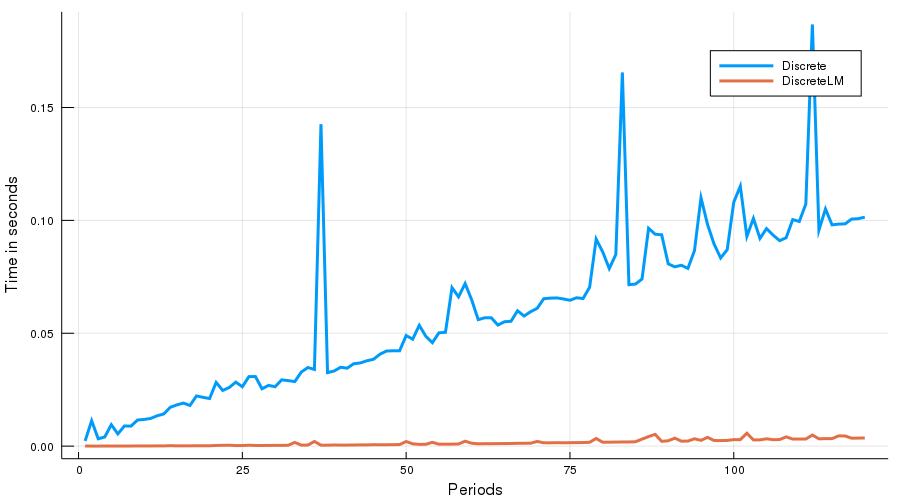

In [29]:
plot(rangeG, TimesDiscrete, lw = 3, label = "Discrete", xlabel = "Periods", ylabel = "Time in seconds")
plot!(rangeG, TimesDiscreteLM, lw = 3, label = "DiscreteLM")

As we can see above, because the **DiscreteLM** has used **less** memory than the Discrete method, DiscreteLM help us avoid to spend too much time on searching for the right value on a big matrix, although they both take us linear time in this question.